<a href="https://colab.research.google.com/github/ViAnisimova/protocol/blob/master/%D0%9D%D1%8D%D1%88_%D0%B3%D0%B5%D0%BD%D0%B5%D1%82%D0%B8%D0%BA%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:147: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:149: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:147: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:149: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:221: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:221: DeprecationWarning: in the future out of bounds indices will 

0.4066068391331022 0.8359150364612963
-0.0038028973381921357


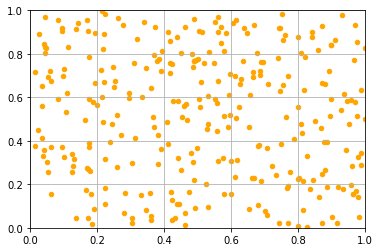

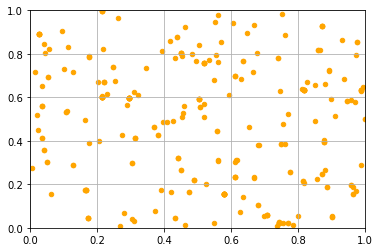

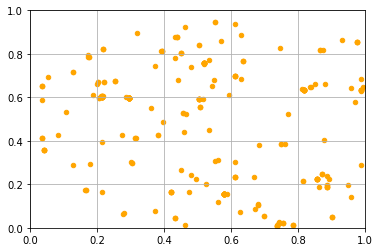

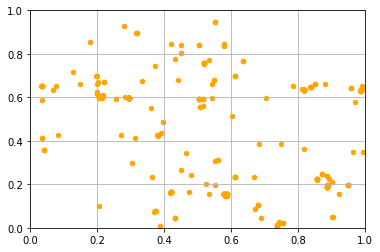

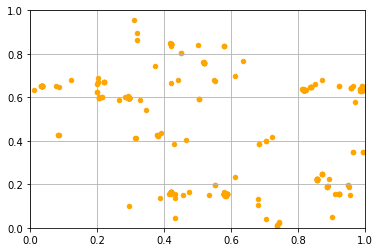

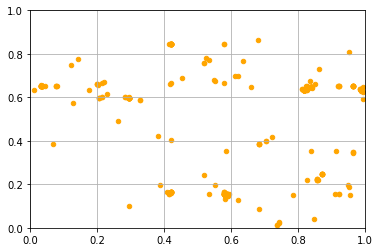

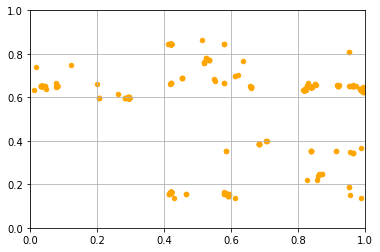

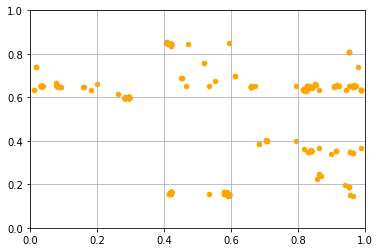

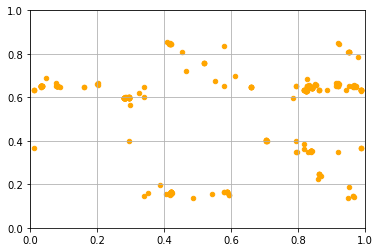

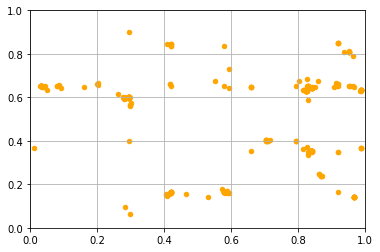

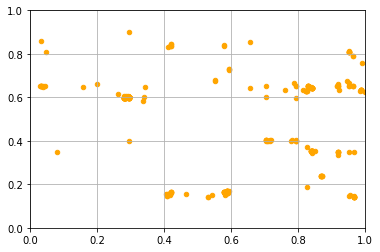

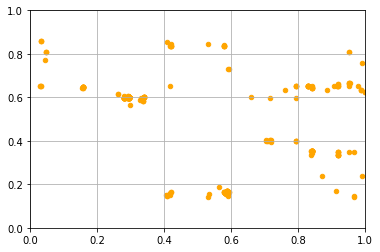

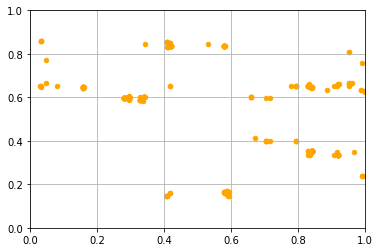

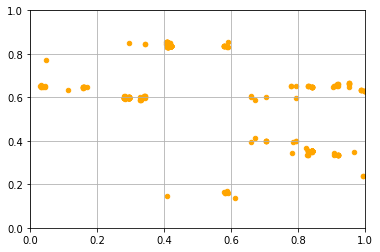

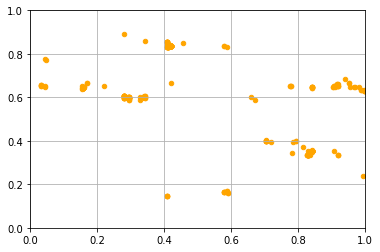

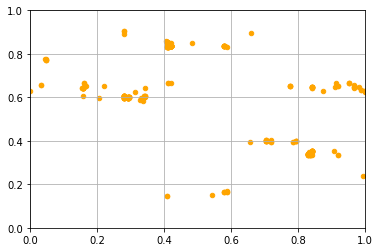

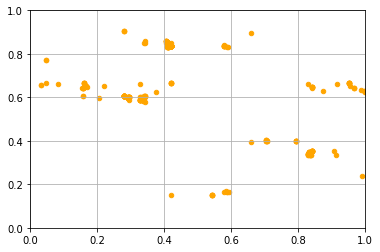

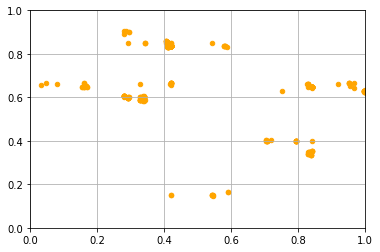

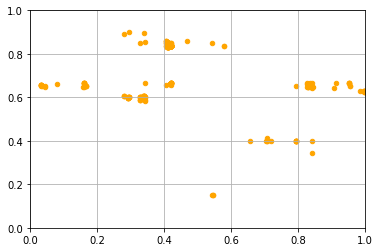

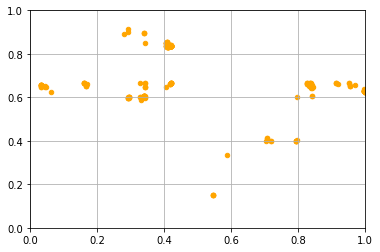

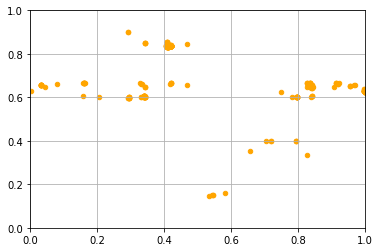

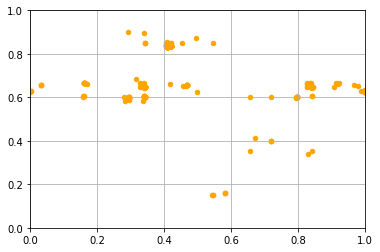

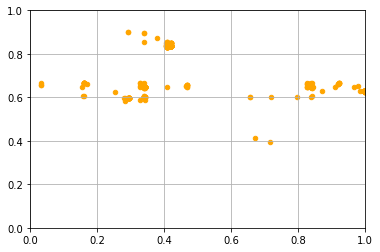

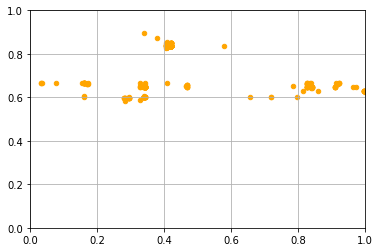

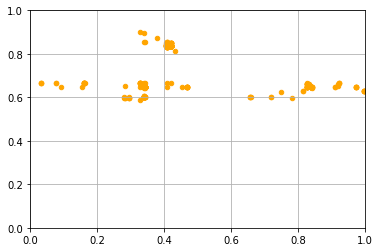

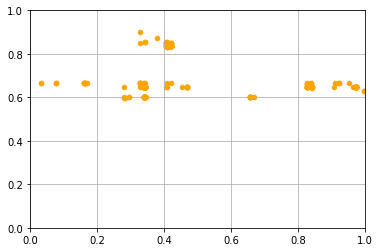

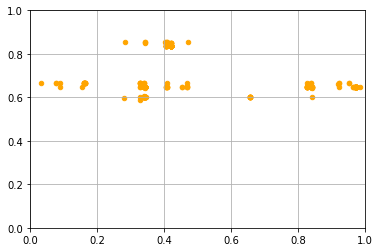

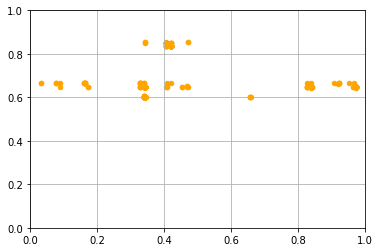

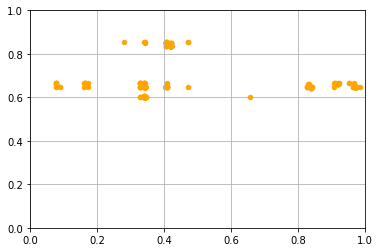

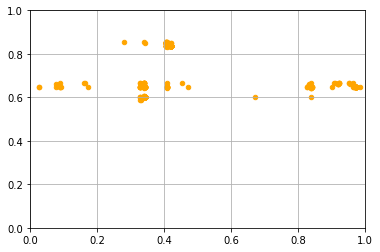

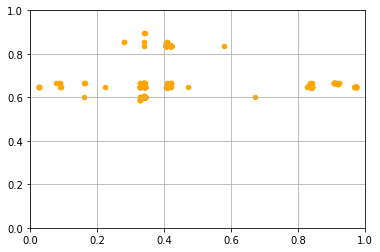

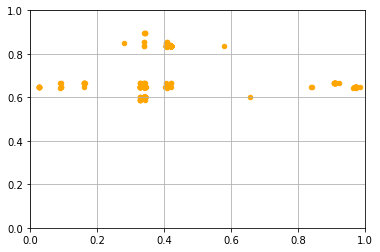

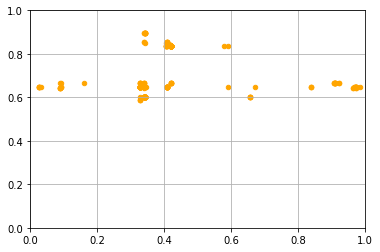

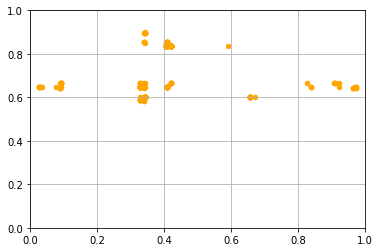

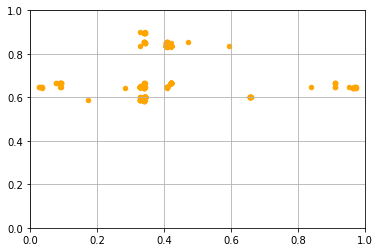

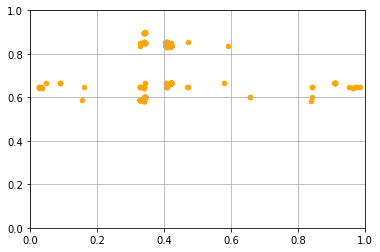

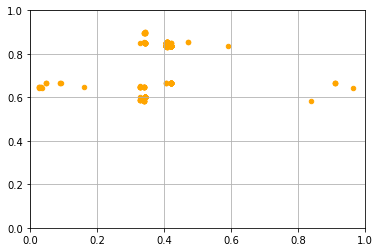

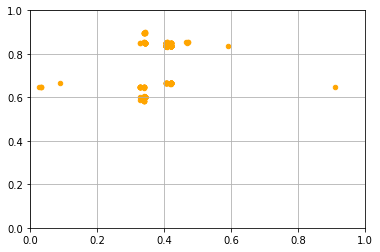

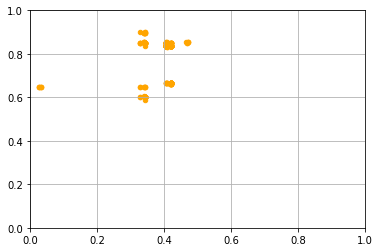

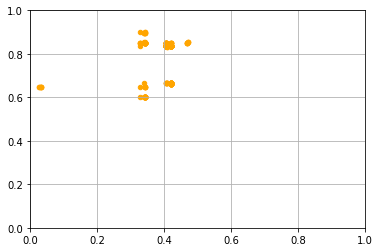

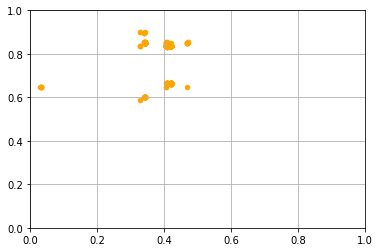

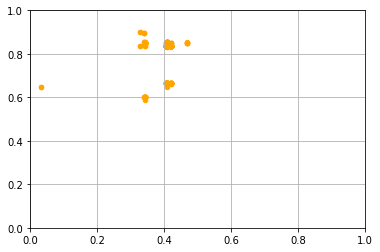

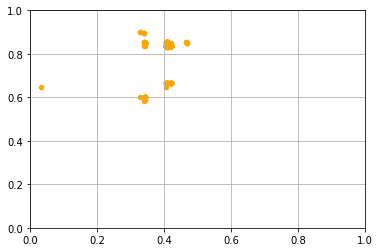

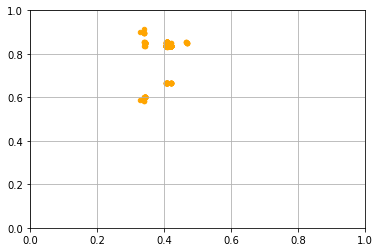

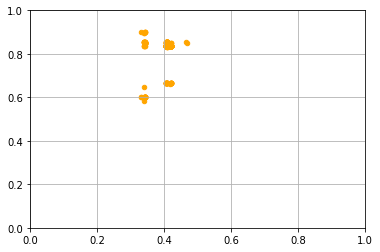

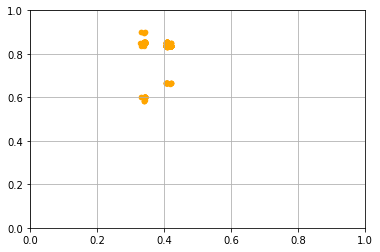

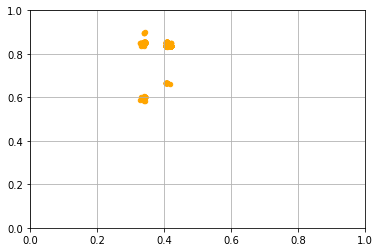

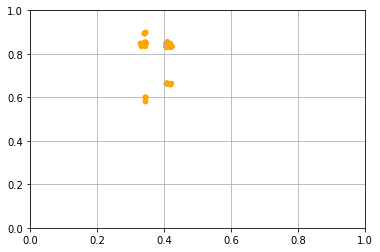

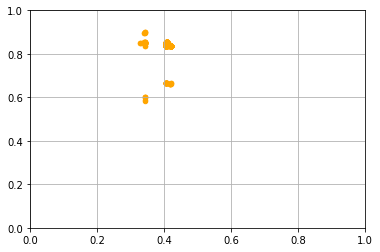

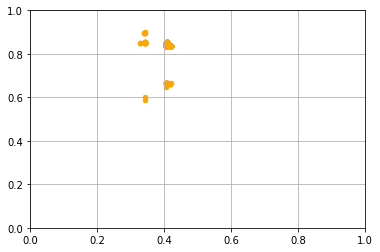

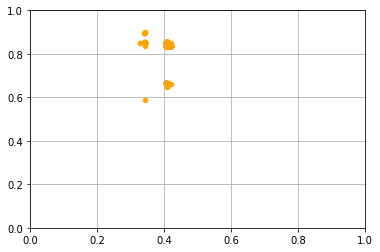

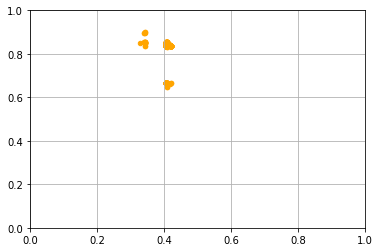

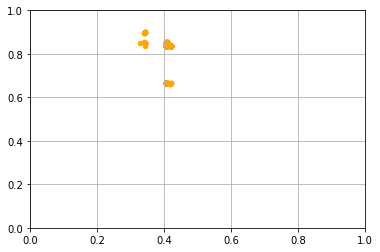

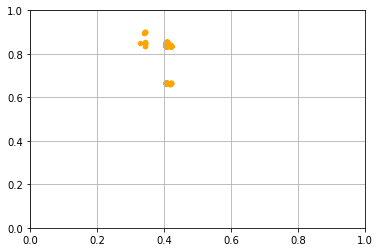

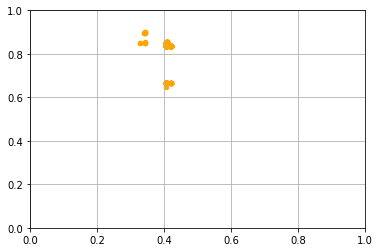

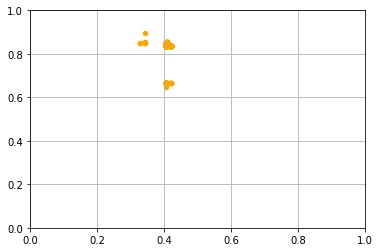

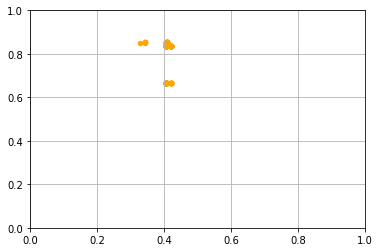

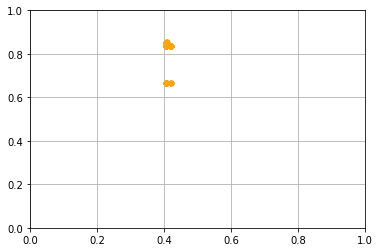

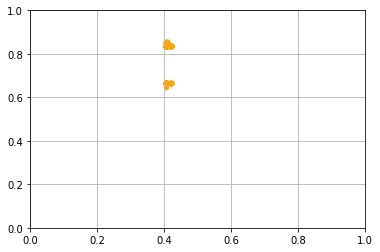

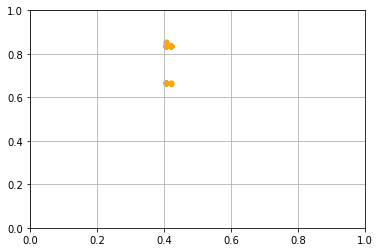

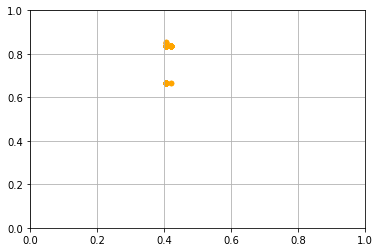

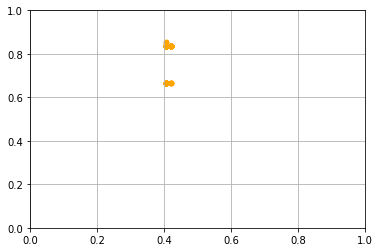

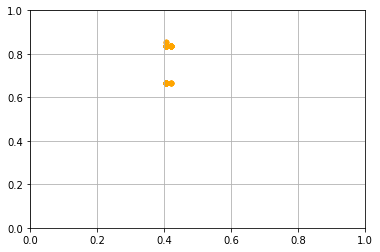

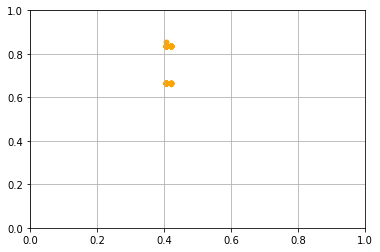

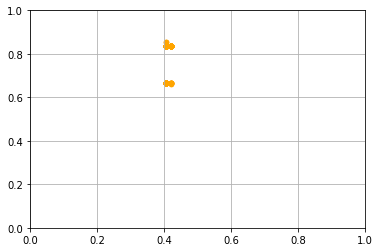

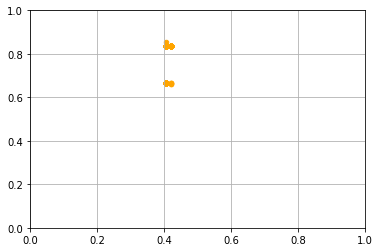

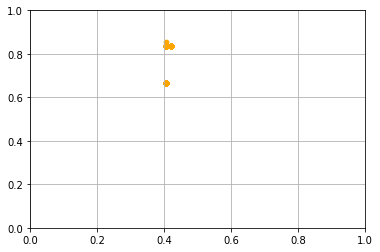

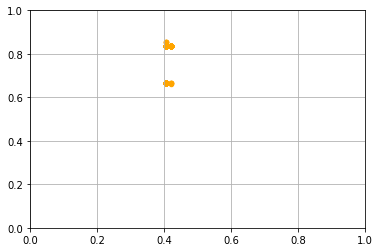

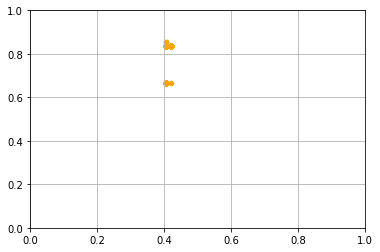

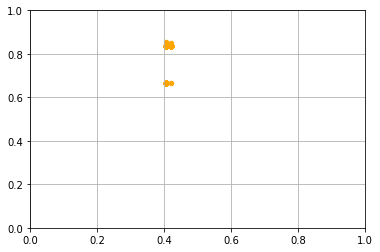

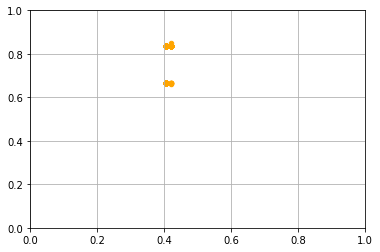

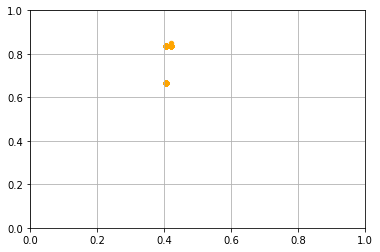

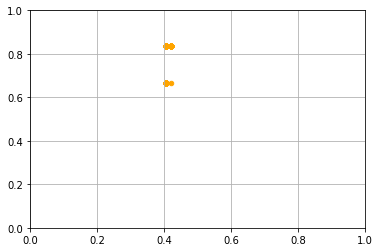

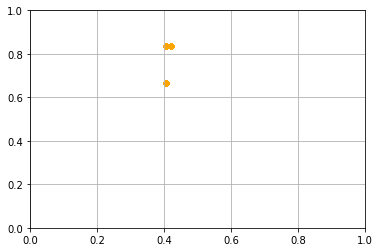

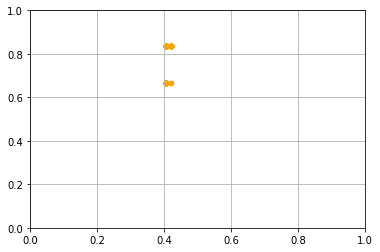

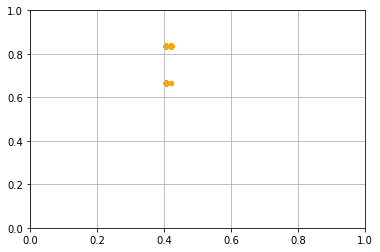

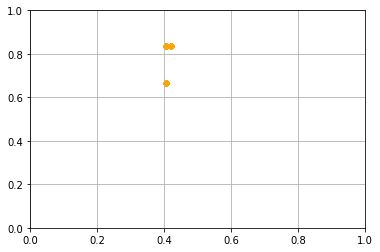

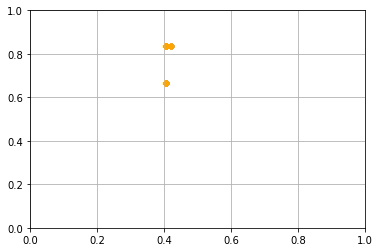

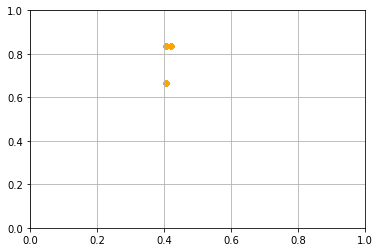

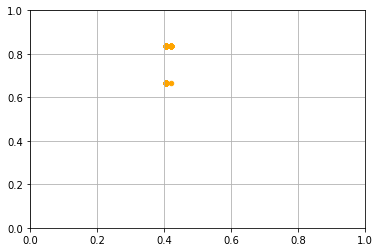

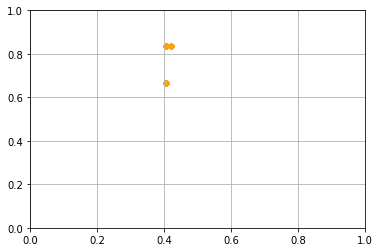

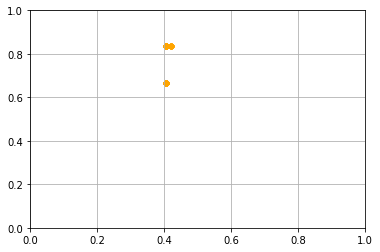

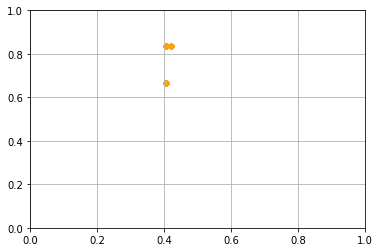

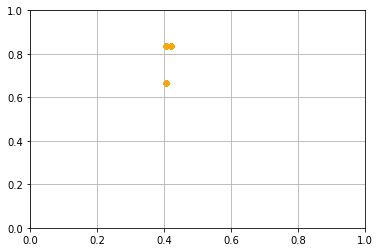

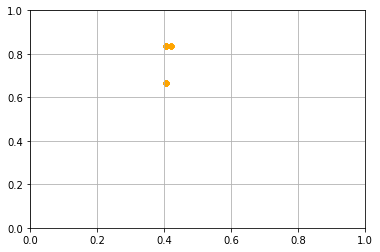

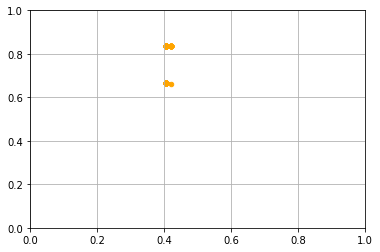

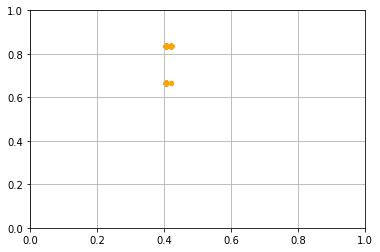

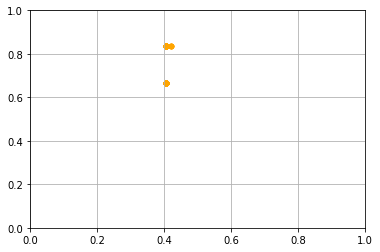

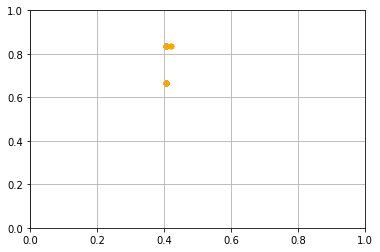

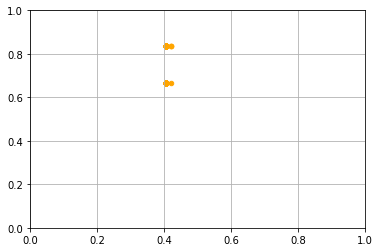

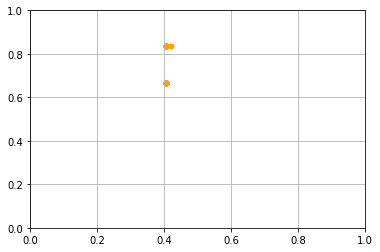

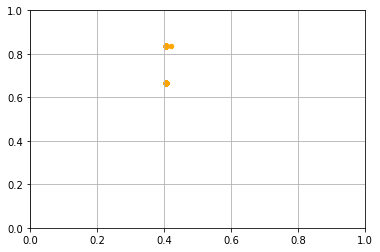

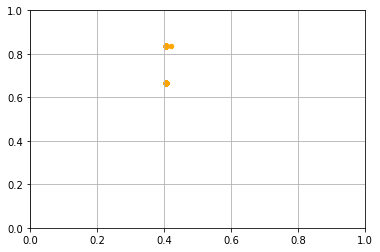

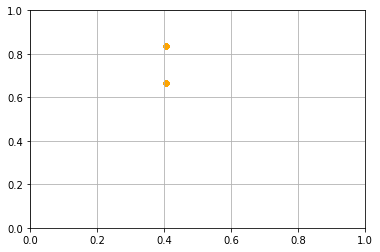

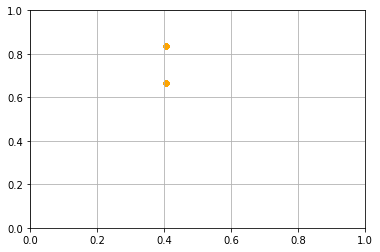

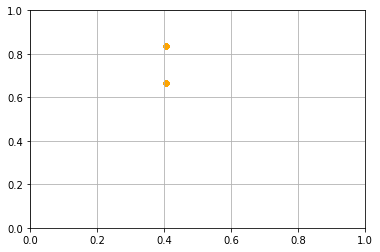

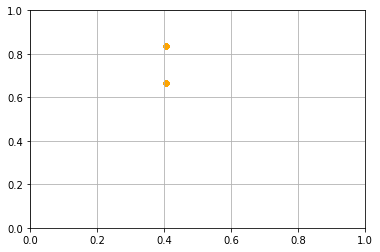

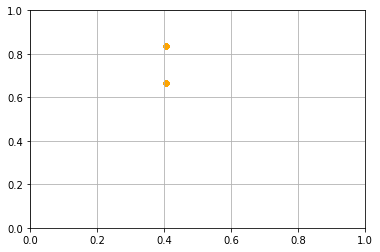

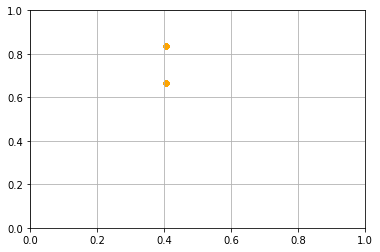

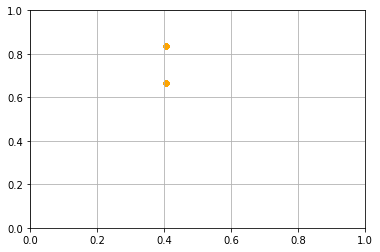

In [1]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt


xl=0
xh=1
m=32
N=300
x=np.random.randint(0,2,size=(N,m)) 
y=np.random.randint(0,2,size=(N,m))  
X = np.zeros(shape=(0,32))
Y = np.zeros(shape=(0,32))
r=20

for i in range(N):
  sum=0; p=0; j=0; k=1; d=0; l=0
  while k<32:
    if j==0:
      p=k-d
    else:
      for z in range(j):
        if x[i,z]==0:
          d=d+1
      p=k-d
    if x[i,j]==1:
      l=(-1)**(p+1)*(2**(m-k+1)-1)*x[i, j]
      sum=sum+l
    k=k+1
    j=j+1
    d=0
  #print(x)
  ch=xl+(sum*(xh-xl)/((2**m)-1))
  X=np.append(X,ch)
#print(X)

for i in range(N):
  sum=0; p=0; j=0; k=1; d=0; l=0
  while k<32:
    if j==0:
      p=k-d
    else:
      for z in range(j):
        if y[i,z]==0:
          d=d+1
      p=k-d
    if y[i,j]==1:
      l=(-1)**(p+1)*(2**(m-k+1)-1)*y[i, j]
      sum=sum+l
    k=k+1
    j=j+1
    d=0
  ch=xl+(sum*(xh-xl)/((2**m)-1))
  Y=np.append(Y,ch)
#print(Y)

def function1(p,q):
  d1=5*p*q-2*p-2*q+4/5
  return d1

def function2(p,q):
  d2=6*p*q-4*p-4*q+8/3
  return d2

def function3(p,q,fn):
  f=(5*p*q-2*p-2*q+4/5)*(6*p*q-4*p-4*q+8/3)+fn
  if (f>0 and fn!=0):
    f=-1*f
  return f

def functionPr(b):
  result=1/(1+(b/(N-1)))**2
  return result


t=0
while (t<100):
  r=r/1.5
  F = np.zeros(shape=(0,N))
  Fl = np.zeros(shape=(0,N))
  D1 = np.zeros(shape=(0,N))
  D2 = np.zeros(shape=(0,N))
  for i in range(N):
    D1 = np.append(D1,function1(X[i],Y[i]))
    D2 = np.append(D2,function2(X[i],Y[i]))
    D11=function1(X[i],Y[i])
    D22=function2(X[i],Y[i])
    if (D11>=0 and D22>=0):
      F_shtraf=0
      F = np.append(F,function3(X[i],Y[i],F_shtraf))
      Fl = np.append(Fl,function3(X[i],Y[i],F_shtraf))
    else:
      F_shtraf = r*((1/D11)+(1/D22))
      F = np.append(F,function3(X[i],Y[i],F_shtraf))
      Fl = np.append(Fl,function3(X[i],Y[i],0))

  Fpr = np.zeros(shape=(0,N))
  b = np.zeros(shape=(0,N))
  br=0
  for i in range(N):
    for j in range(N):
      if (j!=i)&(F[j]<F[i]):
        br=br+1;
    b=np.append(b,br)
    Fpr=np.append(Fpr,functionPr(b[i]))
    br=0
  

  fig, ax = plt.subplots()
  plt.grid()      # включение отображение сетки
  plt.xlim(0,1)
  plt.ylim(0,1)
  plt.scatter(X, Y, color='orange', s=20, marker='o')

  fpr=Fpr
  number = np.zeros(shape=(0,N))
  Number = np.zeros(shape=(0,N))
  chag=10; k=1
  while (len(Number)!=N/2):
    for i in range(0,100,10):
    # print(i,len(fpr),len(Number))
      if (len(Number)!=10*k):
        max=fpr[i]
        num=i
        for j in range (i,i+10,1):
          if (fpr[j]>max and fpr[j]!=0):
            max=fpr[j]
            num=j
        Number = np.append(Number,num)
        fpr[num]=0
    chag=chag-1
    i=0; j=0; k=k+1
  # print(Number)



  # pd.options.display.max_rows = 200
  # df = pd.DataFrame({'Значение х':X,'Значение y':Y,'F':F,'Fl':Fl,'Функция пригодности':Fpr})   
  # print(df)
  # print (Number)

  new_rodx = np.zeros(shape=(N,32))
  new_rody = np.zeros(shape=(N,32))
  for i in range (0,int(N/2),2):
    ch1 = np.random.choice(Number)
    Number = np.delete(Number, ch1)
    ch2 = np.random.choice(Number)
    Number = np.delete(Number, ch2)
    k = random.randint(0, 32)
    for j in range (k):
      new_rodx[i,j] = x[int(ch1),j]
      new_rodx[i+1,j] = x[int(ch2),j]
      new_rody[i,j] = y[int(ch1),j]
      new_rody[i+1,j] = y[int(ch2),j]
    #print(k,x[int(ch1)],new_rodx[0])
    for j in range (k,32,1):
      new_rodx[i,j] = x[int(ch2),j]
      new_rodx[i+1,j] = x[int(ch1),j]
      new_rody[i,j] = y[int(ch2),j]
      new_rody[i+1,j] = y[int(ch1),j]



  new_X = np.zeros(shape=(0,32))
  new_Y = np.zeros(shape=(0,32))
  for i in range(int(N/2)):
    sum=0; p=0; j=0; k=1; d=0; l=0
    while k<32:
      if j==0:
        p=k-d
      else:
        for z in range(j):
          if new_rodx[i,z]==0:
            d=d+1
        p=k-d
      if new_rodx[i,j]==1:
        l=(-1)**(p+1)*(2**(m-k+1)-1)*new_rodx[i, j]
        sum=sum+l
      k=k+1
      j=j+1
      d=0
    #print(x)
    ch=xl+(sum*(xh-xl)/((2**m)-1))
    new_X=np.append(new_X,ch)
  #print(new_X[49])

  for i in range(int(N/2)):
    sum=0; p=0; j=0; k=1; d=0; l=0
    while k<32:
      if j==0:
        p=k-d
      else:
        for z in range(j):
          if new_rody[i,z]==0:
            d=d+1
        p=k-d
      if new_rody[i,j]==1:
        l=(-1)**(p+1)*(2**(m-k+1)-1)*new_rody[i, j]
        sum=sum+l
      k=k+1
      j=j+1
      d=0
    #print(x)
    ch=xl+(sum*(xh-xl)/((2**m)-1))
    new_Y=np.append(new_Y,ch)


  Number = np.zeros(shape=(0,int(N/2)))
  for z in range(0,N,2):
    max=Fpr[z]
    num=z
    if (Fpr[z+1]>max):
      max=Fpr[z+1]
      num=z+1
    Number = np.append(Number,num) 


  for i in range (int(N/2),N,2):
    ch1 = np.random.choice(Number)
    Number = np.delete(Number, ch1)
    ch2 = np.random.choice(Number)
    Number = np.delete(Number, ch2)
    k = random.randint(0, 32)
    for j in range (k):
      new_rodx[i,j] = x[int(ch1),j]
      new_rodx[i+1,j] = x[int(ch2),j]
      new_rody[i,j] = y[int(ch1),j]
      new_rody[i+1,j] = y[int(ch2),j]
    #print(k,x[int(ch1)],new_rodx[0])
    for j in range (k,32,1):
      new_rodx[i,j] = x[int(ch2),j]
      new_rodx[i+1,j] = x[int(ch1),j]
      new_rody[i,j] = y[int(ch2),j]
      new_rody[i+1,j] = y[int(ch1),j]
  #print(new_rodx[99])
    
  for i in range(int(N/2),N,1):
    sum=0; p=0; j=0; k=1; d=0; l=0
    while k<32:
      if j==0:
        p=k-d
      else:
        for z in range(j):
          if new_rodx[i,z]==0:
            d=d+1
        p=k-d
      if new_rodx[i,j]==1:
        l=(-1)**(p+1)*(2**(m-k+1)-1)*new_rodx[i, j]
        sum=sum+l
      k=k+1
      j=j+1
      d=0
    #print(x)
    ch=xl+(sum*(xh-xl)/((2**m)-1))
    new_X=np.append(new_X,ch)

  for i in range(int(N/2),N,1):
    sum=0; p=0; j=0; k=1; d=0; l=0
    while k<32:
      if j==0:
        p=k-d
      else:
        for z in range(j):
          if new_rody[i,z]==0:
            d=d+1
        p=k-d
      if new_rody[i,j]==1:
        l=(-1)**(p+1)*(2**(m-k+1)-1)*new_rody[i, j]
        sum=sum+l
      k=k+1
      j=j+1
      d=0
    #print(x)
    ch=xl+(sum*(xh-xl)/((2**m)-1))
    new_Y=np.append(new_Y,ch)

  X=new_X
  Y=new_Y
  x=new_rodx
  y=new_rody
  t=t+1



# print(F)
max=F[0]
n=0
for i in range(1,N,1):
  if(F[i]>max):
    max=F[i]
    n=i

print(X[n],Y[n])
print(function3(X[n],Y[n],0))
